---IMPORTING LIBRARIES---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sb

---IMPORTING DATASET---

In [ ]:
data = pd.read_csv("pitchdata.csv")

---CLEANING DATASET---

In [ ]:
data.head()

GameID  PitchNumber  Balls  Strikes  \
0  B1A1464A-7D3A-4CA6-9DE6-02E81D30EC10          122      0        0   
1  B1A1464A-7D3A-4CA6-9DE6-02E81D30EC10          124      0        2   
2  BC7DF282-9C14-4A29-866E-05E7BC0C7234          133      0        0   
3  BC7DF282-9C14-4A29-866E-05E7BC0C7234          134      0        1   
4  BC7DF282-9C14-4A29-866E-05E7BC0C7234          197      0        0   

  PitcherHand BatSide  PlateHeight  PlateSide  CalledStrike  
0           R       L     3.527729   0.249041             1  
1           R       L     5.241929   1.372541             0  
2           L       L     2.618399   0.083787             1  
3           L       L     2.901199   1.450787             0  
4           R       L     1.949099   0.823387             1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62577 entries, 0 to 62576
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GameID        62577 non-null  object 
 1   PitchNumber   62577 non-null  int64  
 2   Balls         62577 non-null  int64  
 3   Strikes       62577 non-null  int64  
 4   PitcherHand   62577 non-null  object 
 5   BatSide       62577 non-null  object 
 6   PlateHeight   62466 non-null  float64
 7   PlateSide     62466 non-null  float64
 8   CalledStrike  62577 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 4.3+ MB


Replaced null values from 'PlateHeight' and 'PlateSide' with their respective means

In [ ]:
mean1 = data.PlateHeight.mean()
data['PlateHeight'].fillna(value=mean1, inplace=True)
mean2 = data.PlateSide.mean()
data['PlateSide'].fillna(value=mean2, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62577 entries, 0 to 62576
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GameID        62577 non-null  object 
 1   PitchNumber   62577 non-null  int64  
 2   Balls         62577 non-null  int64  
 3   Strikes       62577 non-null  int64  
 4   PitcherHand   62577 non-null  object 
 5   BatSide       62577 non-null  object 
 6   PlateHeight   62577 non-null  float64
 7   PlateSide     62577 non-null  float64
 8   CalledStrike  62577 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 4.3+ MB


In [ ]:
data.describe()

PitchNumber         Balls       Strikes   PlateHeight     PlateSide  \
count  62577.000000  62577.000000  62577.000000  62577.000000  62577.000000   
mean     145.069035      0.762964      0.729997      2.281051     -0.060027   
std       86.617028      0.931554      0.803104      1.159810      0.989732   
min        1.000000      0.000000      0.000000     -3.641154     -4.410613   
25%       71.000000      0.000000      0.000000      1.463867     -0.801142   
50%      142.000000      0.000000      1.000000      2.234599     -0.075098   
75%      214.000000      1.000000      1.000000      3.112535      0.679718   
max      370.000000      3.000000      2.000000      9.177937      5.231591   

       CalledStrike  
count  62577.000000  
mean       0.313150  
std        0.463779  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

Checking unique values. 
Confirming whether there were switch hitters ('S')
Making sure the counts made sense, and there weren't any mistakes 

In [ ]:
data.PitcherHand.unique()
data.BatSide.unique()

array(['L', 'R'], dtype=object)

In [ ]:
data.Strikes.unique()
data.Balls.unique()

array([0, 1, 2, 3], dtype=int64)

In [ ]:
data.GameID.value_counts()
### 404 Different Games ###

A45A3595-1E4A-4562-A574-FB813D1A2662    217
D70DE0BE-7191-421B-A064-423F4B7DFE7F    216
B58A2337-E436-4D3B-AF69-C761038901B3    215
668A001C-5745-4513-86C8-C68FDA27B12C    212
93E3EBB1-9297-4A1A-BDB0-1635A3C58432    211
                                       ... 
C82FB446-7FD8-4AC9-A644-775936F96739     93
FEB732DD-0DEE-4ABB-BF44-78147A3CDD50     93
B5F40BB6-066A-42FC-ACF8-A50FCE2B60A9     91
0756AE21-05F2-411C-9913-78B121273E76     87
51D4BEEF-B226-40D7-A7D5-B9EC99ACFAEC     77
Name: GameID, Length: 404, dtype: int64

Checking info on 'CalledStrike' column

In [ ]:
data.CalledStrike.value_counts()

0    42981
1    19596
Name: CalledStrike, dtype: int64

In [ ]:
data.CalledStrike.unique()

array([1, 0], dtype=int64)

'GameID' does not seem relevant to the model. Therefore, it was removed for less clutter.

In [ ]:
data = data.drop('GameID', axis =1)

Using Label Encoder to replace 'R' and 'L' to to '1' and '0' respectively.

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
data['PitcherHand'] = lab_enc.fit_transform(data['PitcherHand'])
data['BatSide'] = lab_enc.fit_transform(data['BatSide'])
data.head()

PitchNumber  Balls  Strikes  PitcherHand  BatSide  PlateHeight  PlateSide  \
0          122      0        0            1        0     3.527729   0.249041   
1          124      0        2            1        0     5.241929   1.372541   
2          133      0        0            0        0     2.618399   0.083787   
3          134      0        1            0        0     2.901199   1.450787   
4          197      0        0            1        0     1.949099   0.823387   

   CalledStrike  
0             1  
1             0  
2             1  
3             0  
4             1

Creating new column 'Matchups'
'1' if L/L or R/R matchup, otherwise '0'

In [ ]:
matchups = []
for index, row in data.iterrows():
    if (row['PitcherHand'] == row['BatSide']):
        matchups.append(1)
    else:
        matchups.append(0)
data['Matchups'] = matchups
data.head()

PitchNumber  Balls  Strikes  PitcherHand  BatSide  PlateHeight  PlateSide  \
0          122      0        0            1        0     3.527729   0.249041   
1          124      0        2            1        0     5.241929   1.372541   
2          133      0        0            0        0     2.618399   0.083787   
3          134      0        1            0        0     2.901199   1.450787   
4          197      0        0            1        0     1.949099   0.823387   

   CalledStrike  Matchups  
0             1         0  
1             0         0  
2             1         1  
3             0         1  
4             1         0

Added column 'Time of Game'. This sorted the 'PitchNumber' column into 3 categories (1,2,3) as phases of game. 
1 = 1st third of game 
2 = 2nd third of game
3 = final third of game

This was created with an effort to explain if there was a greater chance of a called strike based on the time of game.
Rather, after some thought, it would be better to simply look at pitch number with called strike. 
This would give an indication whether an umpire is more likely to call a strike at the beginning of a game vs the end of a game.

Therefore, 'Time of Game' will be removed.

In [ ]:
data['Time of Game'] = data['PitchNumber'].apply(
    lambda x: 1 if 1 <= x <= 124 else 2 if 125 <= x <= 250 else 3)
data.head()

PitchNumber  Balls  Strikes  PitcherHand  BatSide  PlateHeight  PlateSide  \
0          122      0        0            1        0     3.527729   0.249041   
1          124      0        2            1        0     5.241929   1.372541   
2          133      0        0            0        0     2.618399   0.083787   
3          134      0        1            0        0     2.901199   1.450787   
4          197      0        0            1        0     1.949099   0.823387   

   CalledStrike  Matchups  Time of Game  
0             1         0             1  
1             0         0             1  
2             1         1             2  
3             0         1             2  
4             1         0             2

In [ ]:
data = data.drop('Time of Game', axis = 1)

In [ ]:
data.corr()

PitchNumber     Balls   Strikes  PitcherHand   BatSide  \
PitchNumber      1.000000  0.043832  0.018037     0.048525 -0.009214   
Balls            0.043832  1.000000  0.350741     0.004096 -0.019583   
Strikes          0.018037  0.350741  1.000000    -0.002382  0.002586   
PitcherHand      0.048525  0.004096 -0.002382     1.000000 -0.095722   
BatSide         -0.009214 -0.019583  0.002586    -0.095722  1.000000   
PlateHeight     -0.001960 -0.003887 -0.078346    -0.005201 -0.021346   
PlateSide       -0.000402  0.000035 -0.041552    -0.117520 -0.178186   
CalledStrike    -0.006104 -0.051897 -0.253184    -0.005508  0.011572   
Matchups         0.014872 -0.010759  0.002529     0.170848  0.437191   

              PlateHeight  PlateSide  CalledStrike  Matchups  
PitchNumber     -0.001960  -0.000402     -0.006104  0.014872  
Balls           -0.003887   0.000035     -0.051897 -0.010759  
Strikes         -0.078346  -0.041552     -0.253184  0.002529  
PitcherHand     -0.005201  -0.117520     -0.005508  0.170848  
BatSide         -0.021346  -0.178186      0.011572  0.437191  
PlateHeight      1.000000   0.184608      0.084809 -0.047109  
PlateSide        0.184608   1.000000      0.029883 -0.126362  
CalledStrike     0.084809   0.029883      1.000000  0.024576  
Matchups        -0.047109  -0.126362      0.024576  1.000000

Since 'Matchups' has a higher correlation with 'Called Strike' compared to 'PitcherHand' and 'BatSide' (and because of multicollinearity)
These columns will be removed.

In [ ]:
data = data.drop(['PitcherHand', 'BatSide'], axis = 1)

Having a strike in the count is fairly correlated with a strike not being called on the next pitch (-0.25)
In other words, it is more likely to have a called strike when there is a count with 0 strikes, compared to 1 or 2. 

A takeaway:
This could be the case because some hitters' approaches are to be more patient/selective early in the count, hence a strike called w/o a swing.
Hitters are more likely to swing at strikes late in the count to stay alive, reducing the chance of a called strike.
Called strikes late in the count likely signify a strikeout looking, or a borderline pitch, called strike with a count of 1 strike.

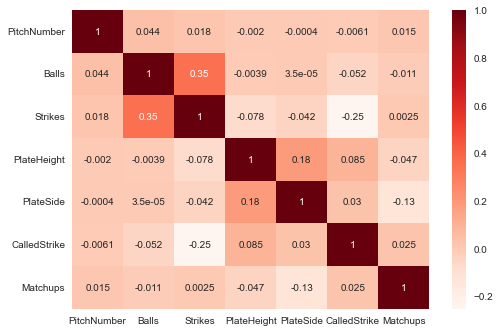

In [ ]:
dataplot = sb.heatmap(data.corr(), cmap='Reds', annot=True, cbar=True)

---TRAINING MODELS---

In [ ]:
x = data.drop('CalledStrike', axis = 1)
y = data['CalledStrike']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=100)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train2 = sc.fit_transform(x_train)
# x_test2 = sc.fit_transform(x_test)

Decision Tree Classifier Model

### EXPLAIN WHAT EVERYTHING MEANS OR REMOVE IT ###

Provide Accuracy level here

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

for name, method in [('Decision Tree', DecisionTreeClassifier(random_state=100))]:
    method.fit(x_train,y_train)
    predict = method.predict(x_test)
    target_names = ['PlateHeight', 'PlateSide']
    print('\nEstimator: {}'.format(name))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict,target_names=target_names))


Estimator: Decision Tree
[[11664  1231]
 [ 1239  4640]]
              precision    recall  f1-score   support

 PlateHeight       0.90      0.90      0.90     12895
   PlateSide       0.79      0.79      0.79      5879

    accuracy                           0.87     18774
   macro avg       0.85      0.85      0.85     18774
weighted avg       0.87      0.87      0.87     18774



Random Forest Classifier

### EXPLAIN WHAT EVERYTHING MEANS OR REMOVE IT ###

Provide Accuracy level here

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

for name, method in [('Random Forest', RandomForestClassifier(random_state=100))]:
    method.fit(x_train,y_train)
    predict = method.predict(x_test)
    target_names = ['PlateHeight', 'PlateSide']
    print('\nEstimator: {}'.format(name))
    #print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict,target_names=target_names))


Estimator: Random Forest
              precision    recall  f1-score   support

 PlateHeight       0.93      0.94      0.93     12895
   PlateSide       0.86      0.84      0.85      5879

    accuracy                           0.91     18774
   macro avg       0.90      0.89      0.89     18774
weighted avg       0.91      0.91      0.91     18774



Support Vector Classification & Gaussian Naive Bayes

### EXPLAIN WHAT EVERYTHING MEANS OR REMOVE IT ###

Provide Accuracy level here

In [ ]:
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import confusion_matrix, classification_report

# for name, method in [('SVM', SVC(kernel='linear', random_state=100)),('Naive Bayes',GaussianNB())]:
#     method.fit(x_train,y_train)
#     predict = method.predict(x_test)
#     target_names = ['PlateHeight', 'PlateSide']
#     print('\nEstimator: {}'.format(name))
#     print(confusion_matrix(y_test,predict))
#     print(classification_report(y_test,predict,target_names=target_names))

Linear Regression Model

### EXPLAIN WHAT EVERYTHING MEANS OR REMOVE IT ###

Provide Accuracy level here

### R2 = 0.08 ###
### This means there is very little strength in correlation ###

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

for name, method in [('Linear Regression', LinearRegression(n_jobs=-1))]:
    method.fit(x_train,y_train)
    predict = method.predict(x_test)
    
print('Method: {} '.format(name))
    
#Coefficients
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table = pd.DataFrame(np.transpose(method.coef_),data.drop('CalledStrike', axis = 1).columns,columns = ['Coefficients'])
print('\n')
print(coeff_table)

#MAE, MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
adjusted_r_squared2 = 1-(1-metrics.r2_score(y_test,predict))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared2))

print('\nMean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test,predict)))
print('\nMean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test,predict)))
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test,predict))))

Method: Linear Regression 

Intercept: 0.33


             Coefficients
PitchNumber     -0.000012
Balls            0.021432
Strikes         -0.148111
PlateHeight      0.025961
PlateSide        0.003931
Matchups         0.028747

R2: 0.08
Adj_R2: 0.08

Mean Absolute Error: 0.40

Mean Squared Error: 0.20
Root Mean Squared Error: 0.45


Called Strike Probability for each pitch

In [ ]:

prediction = method.predict(x)

data1 = {'Pitch Number' : [data.PitchNumber], 'Called Strike Probability' : [prediction]}
df = pd.DataFrame(data1)
print(df)

                                        Pitch Number  \
0  0        122
1        124
2        133
3      ...   

                           Called Strike Probability  
0  [0.4249081268378535, 0.17758312932694725, 0.42...  


Graphic representing the strike zone 

Text(0.5, 1.0, 'Strike Zone')

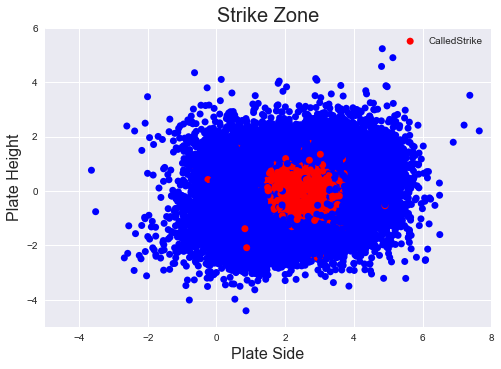

In [ ]:
plt.plot(figsize=(6,6))

col = np.where(data.CalledStrike == 1, 'red', 'blue')

lower = '2'
higher = '4.5'
left = '-0.75'
right = '0.75'

plt.scatter(data['PlateHeight'], data['PlateSide'], c = col, edgecolors = 'green', linewidths=0)
plt.legend(['CalledStrike'])

plt.xlim(-5,8)
plt.ylim(-5,6)

plt.xlabel('Plate Side', fontsize = 16)
plt.ylabel('Plate Height', fontsize = 16)

plt.title('Strike Zone', y = 1.0, fontsize = 20)

# plt.axhline(lower, color = 'yellow', xmin = -0.75, xmax = 0.75)
# plt.axvline(left, color = 'yellow', ymin = 2, ymax = 4.5)
# plt.axhline(higher, color = 'yellow', xmin = -0.75, xmax = 0.75)
# plt.axvline(right, color = 'yellow', ymin = 2, ymax = 4.5)

THINGS TO SUBMIT TO TBJ:

create a simple graphic that visualizes expected called strike percentage as a function of pitch location.

Once you’ve completed the exercise, please provide us with:

(a) the code you used
(b) a .csv with expected called strike probabilities for every pitch
(c) a copy of the graphic you created


THINGS TO DO:
.CSV CONTAINING CALLED STRIKE PROBABILITY FOR EACH PITCH... HAVING TROUBLE
CREATE 3X3 HEATMAP INDICATING PROBABILITY OF STRIKE VS PITCH LOCATION

In [143]:
# # 1. Import Modules
# import numpy as np
# import seaborn as sns
# import matplotlib.pylab as plt
# plt.style.use("seaborn")
 
# # 2. Generate a 10x10 random integer matrix
# data1 = {'Plate Height': np.tile([-6, 0, 6], 3),
#         'Plate Side': np.repeat([-6, 0, 6], 3),
#         }
 
# # 3. Plot the heatmap
# plt.figure(figsize=(5,5))
# heat_map = sns.heatmap( data1, linewidth = 1 , annot = True)
# plt.title( "Called Strike Probability vs. Pitch Location" )
# plt.show()

ValueError: Must pass 2-d input. shape=()

<Figure size 360x360 with 0 Axes>

In [ ]:
# import numpy as np
# import pandas as pd 
# import seaborn as sns

# #create a dataset
# np.random.seed(0)
# data1 = {'Plate Height': np.tile([-6, 0, 6], 3),
#         'Plate Side': np.repeat([-6, 0, 6], 3),
#         'Called Strike': data['CalledStrike']
#         }

# df = pd.DataFrame(data1,columns=['Plate Height','Plate Side','Called Strike'])
# df = df.pivot('Plate Height', 'Plate Side', 'Called Strike')

# sns.heatmap(df)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices